In [54]:
%matplotlib inline
from nuscenes import NuScenes
dataroot='/home/abdo2020/Dropbox (KAUST)/Research/Projects/2021-Smart-CT-data-Inspection/programming/codes-in-process/code-published-online/Smart-Road-Inspection/Carla-simulations/data'
nusc = NuScenes(version='v0.1', dataroot=dataroot, verbose=True)

Loading NuScenes tables for version v0.1...
2 category,
2 attribute,
0 visibility,
1 instance,
9 sensor,
3 calibrated_sensor,
3 ego_pose,
1 log,
1 scene,
3 sample,
17 sample_data,
3 sample_annotation,
1 map,
Done loading in 0.032 seconds.
Reverse indexing ...
Done reverse indexing in 0.0 seconds.


## display annotation


 flag: boxes=[label: nan, score: nan, xyz: [-4.26, 0.42, 14.80], wlh: [2.62, 10.67, 3.64], rot axis: [0.69, -0.69, -0.22], ang(degrees): -110.78, ang(rad): -1.93, vel: nan, nan, nan, name: road.public.Concrete.Bus_lane, token: ann-sdata__37225__S1-UC1, label: nan, score: nan, xyz: [378.89, 1153.35, 50.87], wlh: [5.62, 4.67, 1.64], rot axis: [0.00, 0.00, -1.00], ang(degrees): 21.09, ang(rad): 0.37, vel: nan, nan, nan, name: road.public.Concrete.Bus_lane, token: ann-sdata__37329__S1-UC1, label: nan, score: nan, xyz: [123.26, 60.42, 50.80], wlh: [56.62, 4.67, 1.64], rot axis: [0.00, 0.00, -1.00], ang(degrees): 21.09, ang(rad): 0.37, vel: nan, nan, nan, name: road.public.Concrete.Bus_lane, token: ann-sdata__37447__S1-UC1]


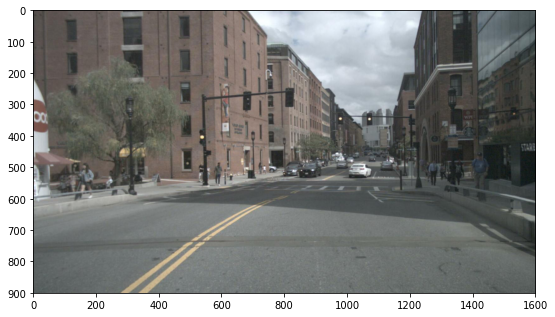

In [55]:

def plot_boxes(nusc, sample_data_token):
	import matplotlib.pyplot as plt
	import numpy as np
	from PIL import Image

	# Load boxes and image.
	data_path, boxes, camera_intrinsic = nusc.get_sample_data(sample_data_token, use_flat_vehicle_coordinates=True)
	data = Image.open(data_path)

	# Init axes.
	_, ax = plt.subplots(1, 1, figsize=(9, 16))

	# Show image.
	ax.imshow(data)

	# Show boxes.
	for box in boxes:
			c = np.array(nusc.explorer.get_color(box.name)) / 255.0
			box.render(ax, view=camera_intrinsic, normalize=True, colors=(c, c, c))
			# print(box)

	# Limit visible range.
	ax.set_xlim(0, data.size[0])
	ax.set_ylim(data.size[1], 0)

# plot exmple
sensor = 'RGB_Camera_Front'
cam_front_data = nusc.get('sample_data', nusc.sample[1]['data'][sensor])
plot_boxes(nusc, cam_front_data['token'])


In [19]:
# show lidar + image annatation
sample = sample_data_token #nusc.sample[0]
my_annotation_token =  sample['anns']#"70aecbe9b64f4722ab3c230391a3beb8"
print(f'\n - sample= {sample["token"]},\n - scene= {sample["scene_token"]},  \
	      \n - Annotations: \n{my_annotation_token}')
# my_annotation_metadata =  nusc.get('sample_annotation', my_annotation_token)
nusc.render_annotation(my_annotation_token[0])



 - sample= 6aa6fa91e0d1492e812eb7e57c47df6e,
 - scene= cc8c0bf57f984915a77078b10eb33198,  	      
 - Annotations: 
['5b627afd7a754127a71338d2b1f8db74', 'd48d02b79fa3450c84803e29acd9ad04']


AssertionError: Error: No LIDAR_TOP in data, unable to render.

Adding ego poses to map...


100%|██████████| 1/1 [00:04<00:00,  4.71s/it]


Creating plot...


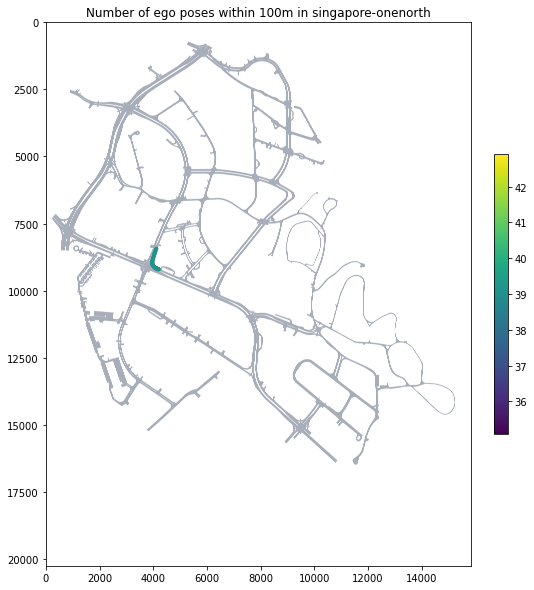

In [18]:
#  show the map
nusc.render_egoposes_on_map(log_location='singapore-onenorth')